Lesson 20-1
---

**Пример с использованием предустановленных данных**

Для демонстрации этих компонентов воспользуемся набором данных AirPassengers, который предустановлен в библиотеке statsmodels в Python.
Пошаговая декомпозиция
Импорт библиотек и загрузка данных:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

data = get_rdataset('AirPassengers', 'datasets').data
data.index = pd.date_range(start = "1949-01", periods = len(data.index), freq = "MS").to_period()
data.index = data.index.to_timestamp()
data.head()



,time,value
1949-01-01,1949.000000,112
1949-02-01,1949.083333,118
1949-03-01,1949.166667,132
1949-04-01,1949.250000,129
1949-05-01,1949.333333,121


In [4]:
# Декомпозиция временного ряда
decomposition = seasonal_decompose(data['value'], model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

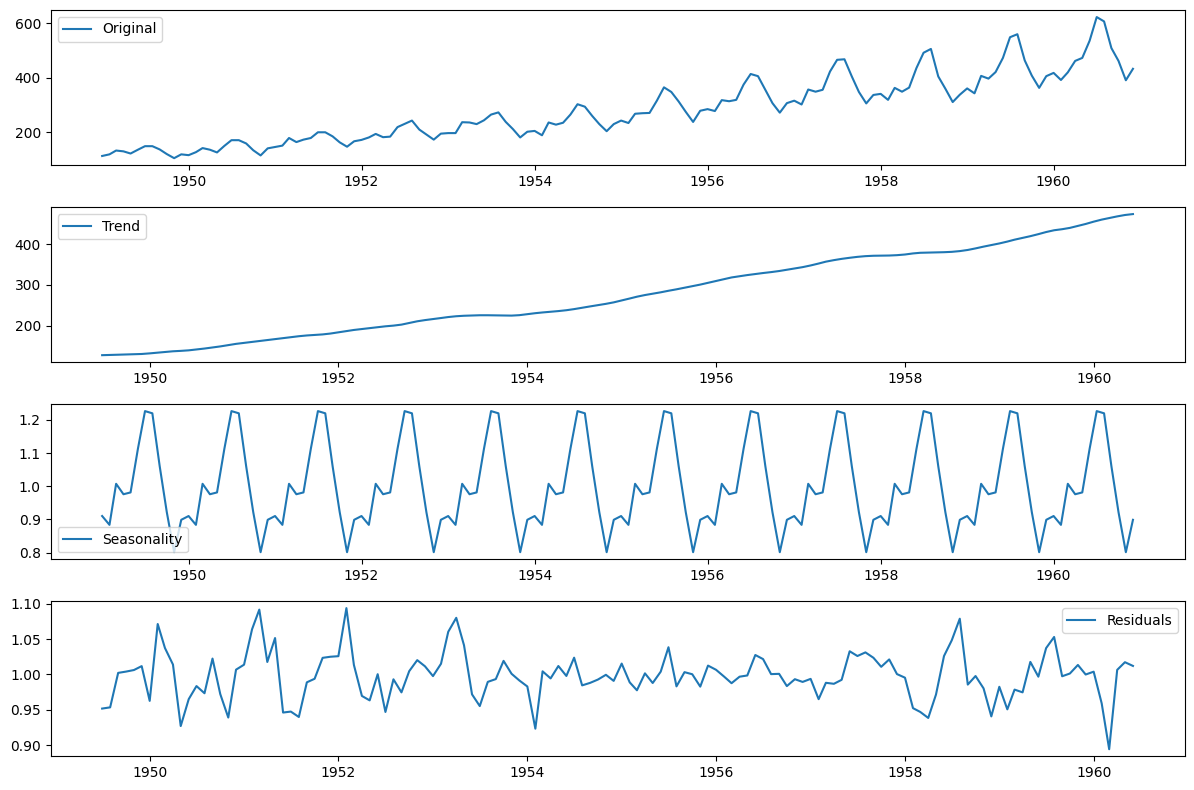

In [5]:
#Постройте график компонентов:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['value'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()



Стационарность
--

In [6]:
#Выполните ADF-тест:

from statsmodels.tsa.stattools import adfuller
result = adfuller(data['value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])



ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641
Критические значения: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [8]:
#Интерпретируйте результаты:
if result[1] < 0.05:
    print("Временной ряд стационарен")
else:
    print("Временной ряд нестационарный")



Временной ряд нестационарный


Автокорреляция
--


Пример с использованием предустановленных наборов данных

Давайте воспользуемся набором данных AirPassengers, который предустановлен в библиотеке statsmodels в Python, чтобы продемонстрировать автокорреляцию и частичную автокорреляцию.


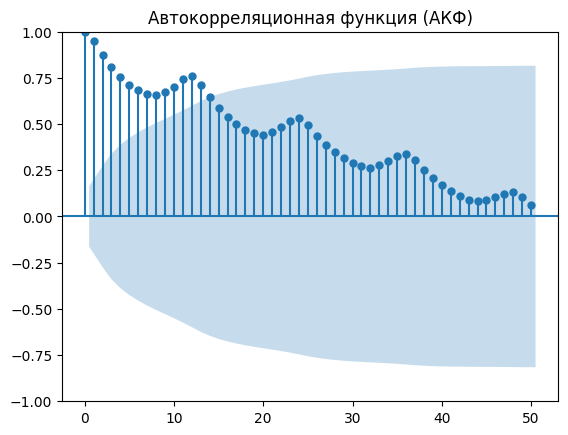

In [9]:
#Постройте график автокорреляционной функции (АКФ):

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['value'], lags=50)
plt.title('Автокорреляционная функция (АКФ)')
plt.show()

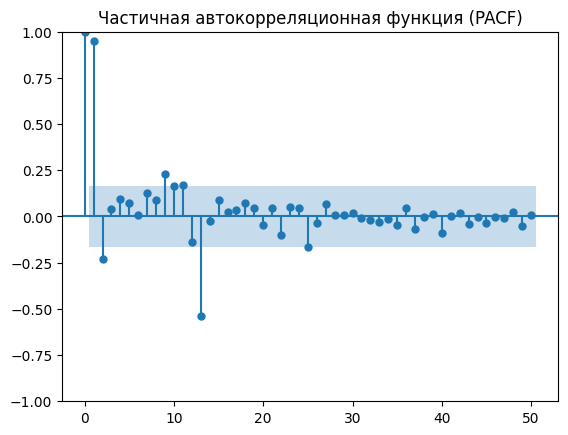

In [10]:
#Постройте график частичной автокорреляционной функции (PACF):
plot_pacf(data['value'], lags=50)
plt.title('Частичная автокорреляционная функция (PACF)')
plt.show()



Повторная выборка
--

In [13]:
#Импорт библиотек и загрузка данных:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(r'Superstore.xlsx', sheet_name='Orders')
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)



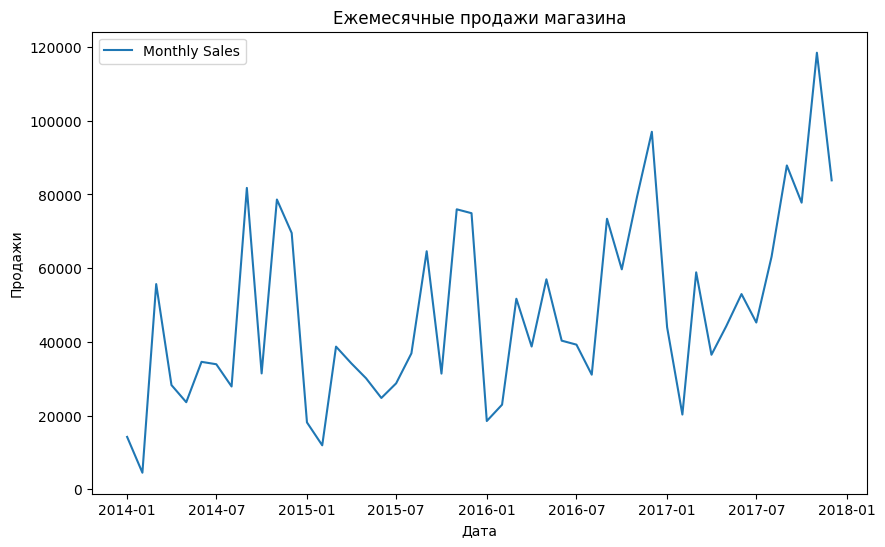

In [15]:
# Агрегируем продажи по месяцам
monthly_sales = data['Sales'].resample('MS').sum()

# Постройте график продаж за месяц
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Ежемесячные продажи магазина')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()



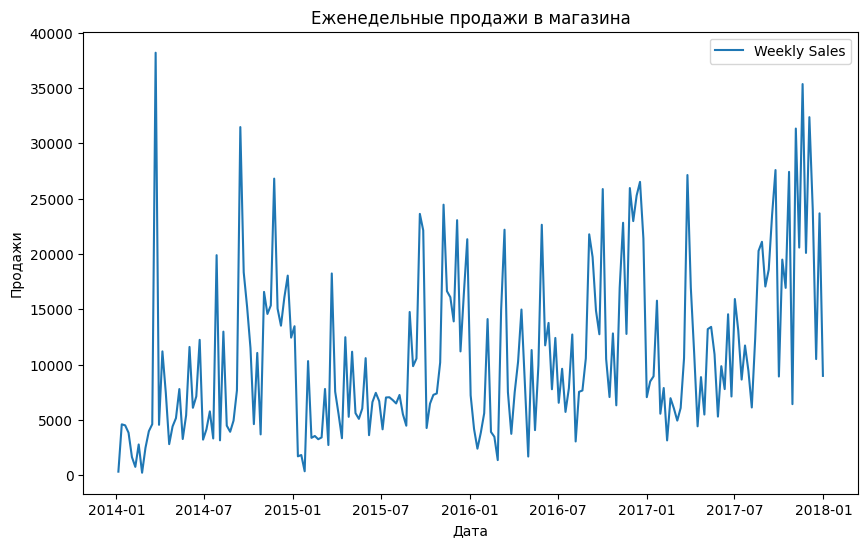

In [19]:
# Агрегирование продаж по неделям
weekly_sales = data['Sales'].resample('W').sum()

# Постройте график недельных продаж
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Еженедельные продажи в магазина')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

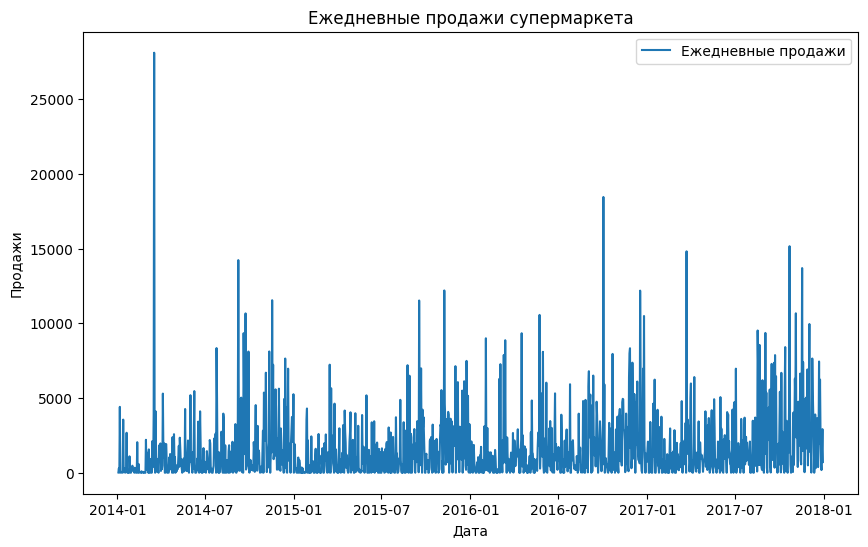

In [20]:
# Агрегирование продаж по дням
daily_sales = data['Sales'].resample('D').sum()

# Постройте график ежедневных продаж
plt.figure(figsize=(10, 6))
plt.plot(daily_sales, label='Ежедневные продажи')
plt.title('Ежедневные продажи супермаркета')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()



Настройка агрегирования

Вы можете настроить метод агрегирования, используя различные функции, такие как mean(), min(), max() и т. д. Например, чтобы найти среднее значение продаж за день:


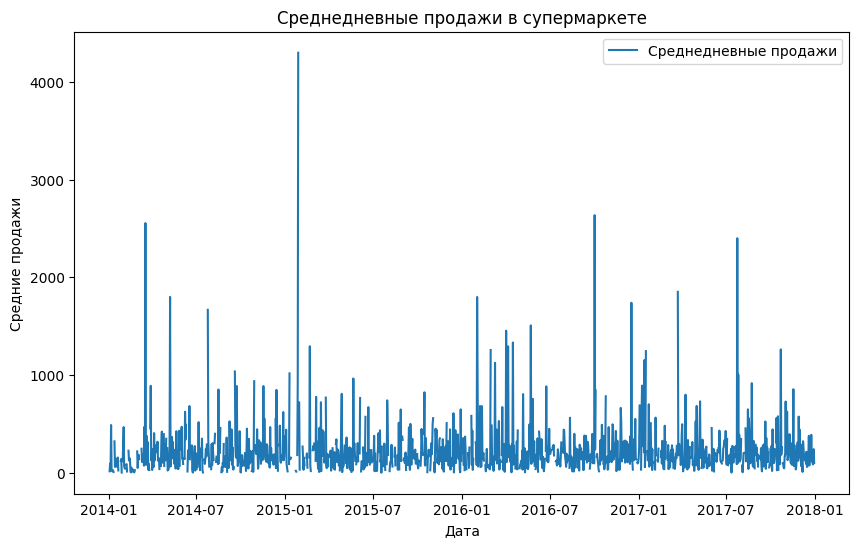

In [21]:
# Агрегируем продажи по дням и вычисляем среднее значение
daily_sales_mean = data['Sales'].resample('D').mean()

# Постройте график среднедневных продаж
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_mean, label='Среднедневные продажи')
plt.title('Среднедневные продажи в супермаркете')
plt.xlabel('Дата')
plt.ylabel('Средние продажи')
plt.legend()
plt.show()



Lesson 20-2
==

ARIMA
--

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Загрузка данных
data = get_rdataset('AirPassengers', 'datasets').data
data.index = pd.date_range(start = "1949-01", periods = len(data.index), freq = "MS").to_period()
data.index = data.index.to_timestamp()

# Определите модель ARIMA
model = ARIMA(data['value'], order=(5, 1, 0))

# Подгонка модели
model_fit = model.fit()
# Выведите итоговое значение модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Sun, 26 Jan 2025   AIC                           1390.135
Time:                        08:48:17   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

*Пример: Оценка модели ARIMA с помощью MSE и RMSE*



In [24]:
# Удаляем невостребованный столбец и делим данные на обучающий и тестовый наборы
del data['time']
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

In [25]:
# Подбор модели ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()



In [26]:
# Сделать прогнозы
predictions = model_fit.forecast(steps=len(test))



In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Вычислить MSE
mse = mean_squared_error(test, predictions)
print('Среднеквадратичная ошибка:', mse)

# Вычислить RMSE
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)



Среднеквадратичная ошибка: 6506.672066800499
Root Mean Squared Error: 80.66394527172905


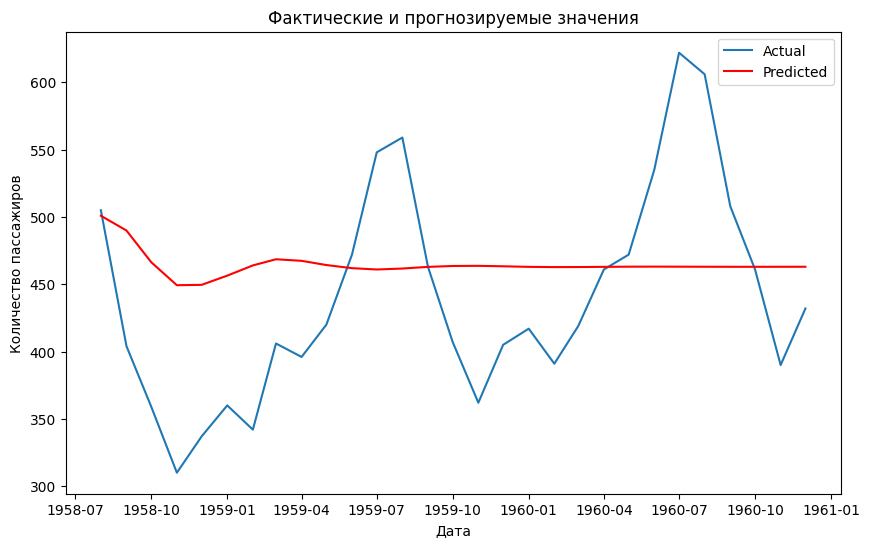

In [28]:
# Постройте график сравнения фактических и прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Фактические и прогнозируемые значения')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()



SARIMA
--

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Определяем модель SARIMA
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Подгонка модели
model_fit = model.fit(disp=False)

# Выведите итоговое значение модели
print(model_fit.summary())



                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Sun, 26 Jan 2025   AIC                           1022.299
Time:                                    08:51:17   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

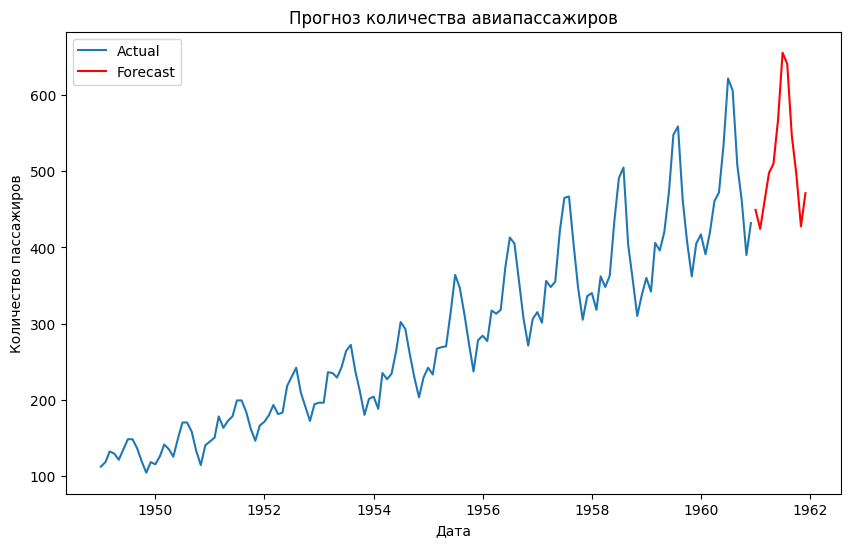

In [30]:
# Сделать прогнозы
forecast = model_fit.forecast(steps=12)

# Постройте график результатов
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Прогноз количества авиапассажиров')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()



Prophet
--

In [32]:
!pip install prophet

  Using cached prophet-1.1.6-py3-none-macosx_10_11_x86_64.whl.metadata (3.5 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-macosx_10_11_x86_64.whl (8.8 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.3 MB/s eta 0:00:00
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)


In [33]:
from prophet import Prophet

data.reset_index(inplace=True)
data.columns = ['ds', 'y'] # Prophet требует, чтобы столбцы были названы 'ds' (дата) и 'y' (значение).

# Создаем экземпляр Prophet
model = Prophet()

# Подгонка модели к данным
model.fit(data)



08:52:04 - cmdstanpy - INFO - Chain [1] start processing
08:52:04 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
# Создаем фрейм данных для хранения прогнозов
future = model.make_future_dataframe(periods=12, freq='M') # Прогнозирование на 12 месяцев вперед

# Делаем прогнозы
forecast = model.predict(future)



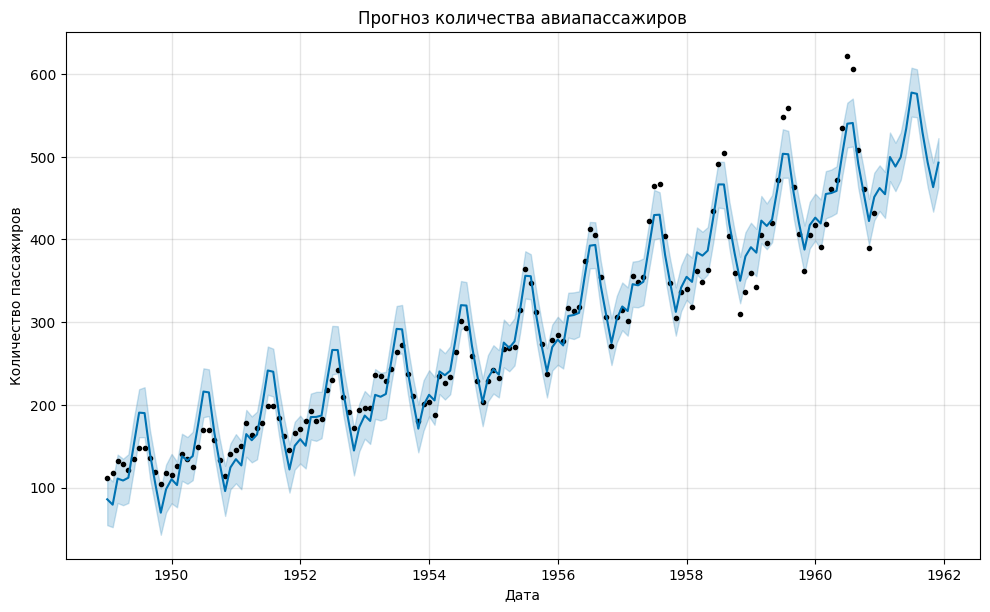

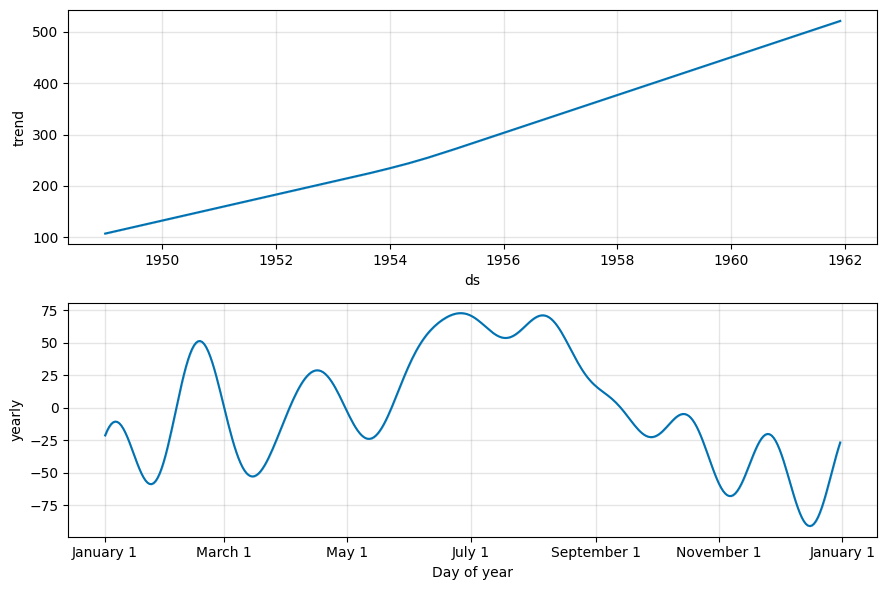

In [35]:
# Построить график прогноза
fig1 = model.plot(forecast)
plt.title('Прогноз количества авиапассажиров')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.show()

# Построить график компонентов прогноза
fig2 = model.plot_components(forecast)
plt.show()

